# <font color="orange">In this course we will follow these topics;</font>
<b>
->> K-Nearest Neighbors Algorithm
<br>
->> Support Vector Regression - SVR
<br>
->> Artificial neural network
<br>
->> Classification and Regression Trees
<br>
->> Random Forests
<br>
->> Gradient Boosting Machines
<br>
->> XGBoost
<br>
->> LightGBM
<br>
->> CatBoost
</b>

# <font color="orange">K-Nearest Neighbors Algorithm</font>
->> The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.
<br>
->> Can be used for both regression and classification problems
<img src="./used_images/knn.png" width="300" height="300">
<br>
->> Let's assume that we have a new observation like above, and we want to predict it, we have its independent values. By knn, these x1,x2 values are compared with other observation units, the similarity is calculated. Then which one is close to our observation units (x1,x2), the y is predicted.
<br>
#### <font color="red">How can we calculate the similarty of observations?</font>
<br>
<b>->> By Euclid or similar kind of calculations, we can calculate the distance to each observation.</b>
<img src="./used_images/euclid.png" width="200" height="200">
<b>->> Lets assume that we take nearest 5 observation to prediction</b>
<img src="./used_images/graph.png" width="200" height="200">
<b>->> We take the nearest k number of observation's y values' mean</b>
<br>

#### <font color="red">Steps of KNN</font>
<b>
->> Determine the number of neighbors (K).
<br>
->> Calculate the distance between unknown point and other points.
<br>
->> Sort the distances and select the appropriate number of neighbors (K).
<br>
->> If problem is classification problem, select the most repeated class, if it is regression, give the mean value as prediction value.
<br>


### <font color="red">KNN Model and Prediction</font>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection , neighbors
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.preprocessing import scale , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.svm import SVR

In [4]:
from warnings import filterwarnings # ignores warnings
filterwarnings("ignore")

In [5]:
df=pd.read_csv("./csv_files/Hitters.csv")
df.dropna(inplace=True)
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df[["Salary"]]
X_=df.drop(columns=["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
knn_model=KNeighborsRegressor().fit(X_train,y_train)

In [7]:
print(knn_model.n_neighbors) # number of default neigh
print(knn_model.metric) # default metric

5
minkowski


In [8]:
predicted=knn_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test,predicted)) # Error Rate of Test set

426.6570764525201

### <font color="red">KNN Model Tuning</font>

In [10]:
knn=KNeighborsRegressor()
knn_param={"n_neighbors":np.arange(1,30,1)}
gridcv_model=GridSearchCV(knn,knn_param,cv=10).fit(X_train,y_train)

In [11]:
yeni_param=gridcv_model.best_params_
yeni_param

{'n_neighbors': 8}

In [12]:
tunedmodel=KNeighborsRegressor(n_neighbors=yeni_param['n_neighbors']).fit(X_train,y_train)
tuned_predictions=tunedmodel.predict(X_test)
np.sqrt(mean_squared_error(y_test,tuned_predictions))

413.7094731463598

In [13]:
arr=[]
for k in range(10):
    k=k+1
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    newpred=knn_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,newpred))
    arr.append(rmse)
    print("k:",k,"rmse",rmse)

k: 1 rmse 455.03925390751965
k: 2 rmse 415.99629571490965
k: 3 rmse 420.6765370082348
k: 4 rmse 428.8564674588792
k: 5 rmse 426.6570764525201
k: 6 rmse 423.5071669008732
k: 7 rmse 414.9361222421057
k: 8 rmse 413.7094731463598
k: 9 rmse 417.84419990871265
k: 10 rmse 421.6252180741266


In [14]:
for k in range(10):
    k=k+1
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    newpred=knn_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,newpred))
    arr.append(rmse)
    print("k:",k,"r squared",r2_score(y_test,newpred))

k: 1 r squared 0.043492714162465695
k: 2 r squared 0.2005901704919013
k: 3 r squared 0.1825011742466076
k: 4 r squared 0.15040003657031897
k: 5 r squared 0.1590920400477076
k: 6 r squared 0.17146266031335877
k: 7 r squared 0.20465959684621493
k: 8 r squared 0.2093550739421146
k: 9 r squared 0.1934722523174407
k: 10 r squared 0.17880988144588528


# <font color="orange">Support Vector Regression (SVR)</font>
->> SVR is strong and flexible modelization technique, can be used  for classification and regression, and also it is a robust regression modeling technique.
<br>
->> SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.
<img src="./used_images/svr.png" width="800" height="800">
<b>
->> Helps you find a regression equation, the differences between the actual values and the predicted values will be no further than a certain value of epsilon and ksi from the two sides of the regression curve. Kinda pressing process.
<br>
->>Thus, we can think that we dont deal with outliers which are less than epsilon values, moreover we deal with greater ones. 
</b>
### <font color="red">Support Vector Regression (SVR) Model and Prediction</font>

In [15]:
df=pd.read_csv("./csv_files/Hitters.csv")
df.dropna(inplace=True)
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df[["Salary"]]
X_=df.drop(columns=["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
svr_model=SVR(kernel="linear").fit(X_train,y_train) # kernel can be linear or rbf

In [17]:
print(svr_model.intercept_) # B0 value
print(svr_model.coef_) # w (B) values

[-80.15196063]
[[ -1.2183904    6.09602978  -3.67574533   0.14217072   0.51435925
    1.28388992  12.55922527  -0.08693754   0.46597185   2.98259931
    0.52944513  -0.79820793  -0.16015531   0.30872795   0.28842348
   -1.79560066   6.41868986 -10.74313785   1.33374319]]


In [18]:
predicted=svr_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,predicted))) # RMSE TEST ERROR


370.0408415795005


### <font color="red">Support Vector Regression (SVR) Model Tuning</font>

In [19]:
# we can change c values for model tuning by using GridSearchCV and k fold cross validation

In [20]:
svr_model=SVR(kernel="linear")

In [21]:
svr_params={"C":[0.1,0.5,1,3]}

In [22]:
# we are fitting the model to find best param, in addition verbose=2 shows report of process, n_jobs for using all cpu
svr_grid_model=GridSearchCV(svr_model,cv=5,param_grid=svr_params,verbose=2,n_jobs=-1).fit(X_train,y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [23]:
bestparam=svr_grid_model.best_params_
bestparam

{'C': 0.5}

In [24]:
# final model
tuned_model=svr_model.set_params(kernel="linear",C=bestparam["C"]).fit(X_train,y_train)

In [25]:
tuned_predicted=tuned_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,tuned_predicted)))

367.98747616655294


# <font color="orange">Artifical Neural Networks</font>
->> Kinda strong algorithm that is used for regression and classification problems which based on human brain's data processing.
<br>
->> The aim is finding coefficients which can predict with minimum error.
<img src="./used_images/ann.png"  width="700" height="600">
->> We can say, inputs are multiplied by weights, and then taken summation of them by sum function, then activation function processes these summation result and gives output.
<br>
->> This process represents the process of an artifical neural network, so when this process is done, it transfers result to other cell and it continues if there is a network.
<img src="./used_images/anns.png"  width="300" height="300">
->> Artifical Neural Networks consist of neural network cells which are related to each other, cells are named as "neurons".
<br>
->> This is consisting of 3 layers, <font color="red">Input, Hidden and Output layer.</font>
<br>
->> Hidden layer can consist of multiple layers. Hidden layer processes the data and the end of the process, it sends to processed data to the other layers, which are inside the hidden layer, or if there is not another layer, it sends to the output layer.
<br>
->> The all cells inside one layer are connected to all other cells which are inside the another layer.
<br>
->> In muliple layered structures, the most used network is Backpropagation network.
<br>
<br>
->> In general, backpropagation has to do with recalculating input weights for artificial neurons using a gradient method. Delta learning does this using the difference between a target activation and an actual obtained activation. Using a linear activation function, network connections are adjusted.
### <font color="red">Steps of Ann</font>
->> Data set is gathered.
<br>
->> Network's topological structure is determined.
<br>
->> The values are assigned to the weights, sometimes done randomly sometimes done by methods.
<br>
->> The dataset sends to the decided neural network.
<br>
->> Advanced calculation processes are done.
<br>
->> Actual and Predicted outputs are compared, and according to comparing result, the weight updates or completion of learning is done.
<img src="./used_images/mathematical_form.png"  width="500" height="500">
### <font color="red">Model and Prediction</font>
->> We do standardization process on our dataset because almost all machine learning algorithms likes the standardization process, but while some algorithms works well with heterogeneous datasets, some algorithms works well with homogenous datasets.
<br>
->> Artifical Neural Networks algorithm works well on the homogenous datasets because there are some values that the difference between actual and predictions can cause an outlier. Therefore, generally the artifical neural networks are used after standardization process.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale,StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
df=pd.read_csv("./csv_files/Hitters.csv")
df.dropna(inplace=True)
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df[["Salary"]]
X_=df.drop(columns=["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
scaler= StandardScaler() # Creating a scaler object to standardization

In [28]:
scaler.fit(X_train) # fitting the train datasets
X_train_scaled=scaler.transform(X_train)  # transorming the trained dataset 

In [29]:
scaler.fit(X_test)
X_test_scaled=scaler.transform(X_test) # Similar process needs to be done for test dataset

In [30]:
mlp_model=MLPRegressor().fit(X_train_scaled,y_train) # Creating a model

In [31]:
y_pred=mlp_model.predict(X_test_scaled) # Prediction
y_pred

array([ 21.11842253,  31.90551057,  68.02407758,   7.99849986,
        21.54459642,   2.86866031,   9.8572241 ,   7.86229315,
        71.13562611,  34.96010131,  19.29147522,  73.21939073,
        17.56987173,  21.87392921,   1.72781424,  41.94529803,
        46.05728789,   3.43596293,  49.69909685,   6.45030763,
         3.37748186,  36.94102326,  14.34407427,   6.66578204,
        37.41679413,   3.65589706,  66.81935771,   2.47154468,
        29.75785948,   3.15135674,   3.61994858,   4.62982474,
         1.3457402 ,  14.84412572,   2.67901693,  41.62760131,
       119.7835638 ,   3.2208412 ,   4.08625025,   2.66900349,
         3.3412649 ,   5.37288457,   5.72262136,   4.16209383,
        75.44416968,  27.99429046,   7.51557388,   3.62395578,
         5.90152136,  25.00447145,  34.72869152,   1.61153764,
        27.57690485,   5.28026825,   3.44670767,  21.48880042,
         5.9177755 ,  39.84691745,   3.36135065, 115.30474152,
       123.47406741,   9.95946547,  32.98340806,   3.47

In [32]:
np.sqrt(mean_squared_error(y_test,y_pred)) # Test Error 

662.9371096576372

### <font color="red">Model Tuning</font>

In [33]:
from sklearn.model_selection import GridSearchCV #For tuning we need to imprt gridsearchcv func

In [34]:
from warnings import filterwarnings # ignores warnings
filterwarnings("ignore")

In [35]:
mlp_params={"alpha":[0.1,0.01,0.02,0.001,0.0001],"hidden_layer_sizes":[(10,20),(5,5),(100,100)]} 
# alpha -> Lambda variables (penalty)
# (10,20) -> this created 2 hidden layer, first one consists of 10 neurons, second one 20

In [36]:
#First thing is we need to finish scaling process
scaler=StandardScaler() # object
scaler.fit(X_train) # fit
x_train_scaled=scaler.transform(X_train) # transform

##########

scaler.fit(X_test)
x_test_scaled=scaler.transform(X_test)

mlp_model=MLPRegressor().fit(X_train_scaled,y_train)

In [37]:
mlp_cv_model=GridSearchCV(mlp_model,param_grid=mlp_params,cv=10,verbose=2,n_jobs=-1).fit(X_train_scaled,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [38]:
best_params=mlp_cv_model.best_params_
best_params           # we got best params for model

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

In [39]:
tuned_mlp_model=MLPRegressor(alpha=best_params["alpha"],hidden_layer_sizes=best_params["hidden_layer_sizes"]).fit(X_train_scaled,y_train)

In [40]:
final_predicted=tuned_mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,final_predicted)) # RMSE TEST FINAL ERROR

354.74438490444294

# <font color="orange">Classification and Regression Trees (CART)</font>
->> The aim is transforming complex structures into simple decision structures inside the dataset.
<br>
->> Heterogenous datasets splits into homogenous groups to an determined aimed variable, It is used to predict outcomes based on certain predictor variables.
<br>
->>They are excellent for data mining tasks because they require very little data pre-processing. Decision tree models are easy to understand and implement which gives them a strong advantage when compared to other analytical models.
<br> 
->> Decision Trees are interested to transormation of complex structures into simple decision structures. 
##### <font color="red">How can we do this?</font>
( Dependent variable also called as target variable)
<br>
->> Heterogenous dataset means the first form of our dataset, the target variable is splitted into homogenous form, and then the prediction is done.
<br>
->> This algorithm is tend to overfitting, and the prediction success is lower than other algorithms in more complex problems and huge datasets. Also this algorithm is the base of other tree algorithms.
<img src="./used_images/example.png">
### <font color="red">Classification and Regression Trees (CART) Model and Prediction</font>

In [110]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor


In [111]:
df=pd.read_csv("./csv_files/Hitters.csv")
df.dropna(inplace=True)
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df[["Salary"]]
X_=df.drop(columns=["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [112]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

In [113]:
cart_model=DecisionTreeRegressor().fit(X_train,y_train)

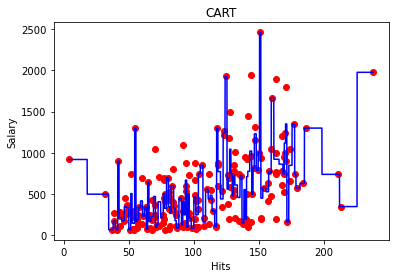

In [114]:
X_grid=np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train,color="red")
plt.plot(X_grid,cart_model.predict(X_grid),color="blue")
plt.title("CART")
plt.xlabel("Hits")
plt.ylabel("Salary");

In [115]:
# one variable prediction
predicted=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predicted)) # RMSE TEST ERROR

468.49579052913884

In [116]:
# prediction for all varaibles

In [117]:
df=pd.read_csv("./csv_files/Hitters.csv")
df.dropna(inplace=True)
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df[["Salary"]]
X_=df.drop(columns=["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [118]:
cart_model=DecisionTreeRegressor().fit(X_train,y_train)
predicted=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predicted)) #RMSE TEST ERROR FOR ALL VARIABLES

455.1304099242193

### <font color="red">Classification and Regression Trees (CART) Model Tuning</font>

In [119]:
# max_leaf_nodes, max_depth, min_samples_split,splitter generally these parameters are changing, critial ones.

In [124]:
cart_model=DecisionTreeRegressor().fit(X_train,y_train)
predicted=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predicted)) #RMSE TEST ERROR FOR ALL VARIABLES

452.3421786787781

In [121]:
cart_params={"min_samples_split":[2,10,5,30,50,10],"max_depth":[2,3,4,5,10,20]}
cart_gridcv_model=GridSearchCV(cart_model,param_grid=cart_params,cv=10).fit(X_train,y_train)

In [122]:
cart_gridcv_model.best_params_

{'max_depth': 10, 'min_samples_split': 50}

In [123]:
# final model

final_model=DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(X_train,y_train)
predicted=final_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predicted)) # RMSE TEST ERROR

361.0876906511434